
Working definition: Distance between poly(A) site distributions from quantification and from the corresponding 3'end dataset calculated for each gene separately.

Notes: Could either be for all genes or a subset. Possibly with some threshold value to count genes with correct quantification. Whereas Q2 focuses on expression value, this measures site usage (values in [0,1]).

 
Could calculate the weighted Jaccard similarity of relative usage of all sites (from 3'-seq and RNA-seq). For each gene, after taking the union of all sites, the relative usage of site i is calculated as TPM_i/sum_j(TPM_j) to yield vectors T = [t1,..,tn] and P[p1,..,pn] for the 3' end and RNA-seq based values. Similarity is then J = (sum_i min(ti,pi))/(sum_i max(ti, pi)).

The procedure for mapping sites between the two sets needs to be defined.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gffutils
from tqdm import tqdm

In [57]:
# create bed annotation file that has unique features (remove children from gff)

db = gffutils.create_db('gencode.v38.annotation.gff3', dbfn='hsap.db', force=False, verbose=True, merge_strategy='merge')

all_genes = [i.id for i in db.features_of_type('gene')]

with open('only_genes.bed', 'w') as f:
    f.write('chrom\tchromStart\tchromEnd\tname\tscore\tstrand\n')
    for gene in all_genes:
        f.write(db[gene].seqid.strip('chr') + '\t')
        f.write(str(db[gene].start) + '\t')
        f.write(str(db[gene].end) + '\t')
        f.write(gene + '\t')
        f.write('0\t')
        f.write(db[gene].strand + '\n')

## annotate sites

```bash
wget http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gff3.gz

gunzip gencode.v38.annotation.gff3.gz

bedtools intersect -wo -s -a GSM1003590.clusters.2.0.GRCh38.96.bed -b only_genes.bed > s1.bed

bedtools intersect -wo -s -a SRX351950.clusters.2.0.GRCh38.96.bed -b only_genes.bed > s2.bed
```

In [130]:
s1 = pd.read_csv('s1.bed', delimiter='\t', header=None, usecols=[0, 1, 2, 4, 5, 14], dtype={0: str})[[0, 1, 2, 14, 4, 5]]
s2 = pd.read_csv('s2.bed', delimiter='\t', header=None, usecols=[0, 1, 2, 4, 5, 14], dtype={0: str})[[0, 1, 2, 14, 4, 5]]

In [149]:
LEN = 0 # distance to extend PAS coordinates to help find overlap
OLP = 0.8 # percent overlap needed to match sites

# initialize PAS usage column
usage = np.zeros(len(s1))+1

s1_temp = s1.copy()
s2_temp = s2.copy()

# go through genes
for gene in tqdm(np.intersect1d(s1[14], s2[14])):
    # get sites for the respective gene
    gene_mask_s1 = np.array(s1_temp[14]==gene)
    gene_mask_s2 = np.array(s2_temp[14]==gene)
    
    v_gene_s1 = s1_temp[gene_mask_s1]    
    v_gene_s2 = s2_temp[gene_mask_s2]
    
    # drop the processed gene to speed up search
    s1_temp.drop(s1_temp[gene_mask_s1].index, inplace=True)
    s2_temp.drop(s2_temp[gene_mask_s2].index, inplace=True)
    
    # if either data set has all zero TPM values for that gene, skip
    if np.sum(v_gene_s1[4]) == 0 or np.sum(v_gene_s2[4]) == 0:
        continue
    
    usage_s1 = v_gene_s1[4]/np.sum(v_gene_s1[4])
    usage_s2 = v_gene_s2[4]/np.sum(v_gene_s2[4])
    
    coords_s2 = [np.arange(i[1]-LEN, i[2]+1+LEN) for _, i in v_gene_s1.iterrows()]
    
    # match the sites
#     for idx, PAS in v_gene_s1.iterrows():
    
    
    
    
#     # if there is only one site for a given gene, usage will remain 1 (initial value)
#     if len(v_gene) > 1:
#         # if none of the sites have expression values we can't calculate usage -> nan
#         if np.sum(v_gene[4]) == 0:
#             np.put(usage, list(v_gene.index), np.array([np.nan]*len(v_gene)))
#         # calculate PAS usage
#         else:
#             np.put(usage, list(v_gene.index), np.array(v_gene[4])/np.sum(v_gene[4]))

# add to df
# s1['usage'] = usage

  0%|          | 72/33203 [00:03<29:53, 18.48it/s]


KeyboardInterrupt: 

In [117]:
np.sum(s1['usage']==s1['usage'])/len(s1)

0.7283821876069281

In [154]:
coords_s2 = [np.arange(i[1], i[2]+1) for _, i in v_gene_s2.iterrows()]

In [157]:
coords_s2

[array([7225320, 7225321, 7225322, 7225323, 7225324, 7225325, 7225326,
        7225327, 7225328, 7225329, 7225330, 7225331, 7225332, 7225333,
        7225334, 7225335, 7225336, 7225337, 7225338, 7225339, 7225340,
        7225341, 7225342, 7225343, 7225344, 7225345, 7225346, 7225347,
        7225348, 7225349, 7225350, 7225351, 7225352, 7225353, 7225354,
        7225355, 7225356, 7225357, 7225358, 7225359, 7225360, 7225361,
        7225362, 7225363, 7225364, 7225365, 7225366, 7225367]),
 array([7225400, 7225401, 7225402, 7225403, 7225404, 7225405, 7225406,
        7225407, 7225408, 7225409, 7225410, 7225411, 7225412, 7225413,
        7225414, 7225415, 7225416, 7225417, 7225418, 7225419, 7225420,
        7225421, 7225422, 7225423, 7225424, 7225425, 7225426, 7225427,
        7225428, 7225429, 7225430, 7225431, 7225432, 7225433, 7225434,
        7225435, 7225436, 7225437, 7225438, 7225439, 7225440, 7225441,
        7225442, 7225443, 7225444, 7225445, 7225446, 7225447, 7225448,
        72254

In [156]:
v_gene_s1

,0,1,2,14,4,5
135821,17,7225320,7225367,ENSG00000004975.12,45.0289,-
135822,17,7225400,7225450,ENSG00000004975.12,0.0000,-
135823,17,7229267,7229269,ENSG00000004975.12,0.0000,-
135824,17,7229381,7229390,ENSG00000004975.12,0.0000,-
135825,17,7230132,7230133,ENSG00000004975.12,0.0000,-
135826,17,7230799,7230809,ENSG00000004975.12,0.0000,-


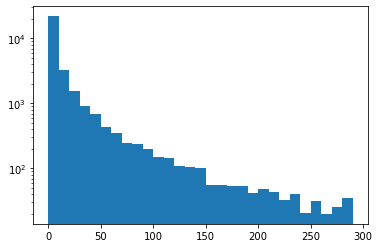

0.08563483399323264


In [64]:
plt.hist(np.array(s1[4][s1[4]!=0]), bins=np.arange(0, 300, 10))
plt.yscale('log')
plt.show()
print(np.sum(s1[4]!=0)/len(s1))

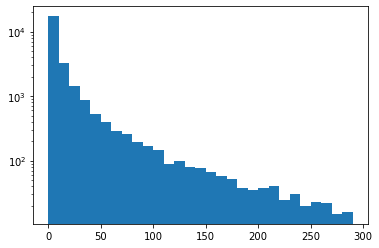

0.07069884151011031


In [67]:
plt.hist(np.array(s2[4][s2[4]!=0]), bins=np.arange(0, 300, 10))
plt.yscale('log')
plt.show()
print(np.sum(s2[4]!=0)/len(s2))